### Import Libraries

In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns


### Load the Dataset

In [6]:
file_path = 'processed_space_traffic.csv'
data = pd.read_csv(file_path)
print(data.head())


   Traffic_Density  Year  Month  Day  Hour  Peak_Time_Hour  Location_Encoded  \
0               17  2024     10   21    21              15                 1   
1               21  2024     10   11     5              15                 4   
2               88  2024     10   29    13               6                 4   
3               65  2024     10   24     8               8                 2   
4                9  2024     10   23    17               6                 0   

   Object_Type_Asteroid Mining Ship  Object_Type_Manned Spacecraft  \
0                             False                          False   
1                             False                          False   
2                             False                          False   
3                             False                          False   
4                             False                          False   

   Object_Type_Satellite  Object_Type_Scientific Probe  \
0                  False                

### Define Features (X) and Target (y)

In [7]:
X = data.drop(columns=['Traffic_Density', 'Traffic_Density_Category'])
y = data['Traffic_Density']

## Split the Data

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)


Training set shape: (800, 12)
Testing set shape: (200, 12)


### Train a Linear Regression Model

In [9]:
model = LinearRegression()
model.fit(X_train, y_train)
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)


Coefficients: [ 0.00000000e+00  2.98372438e-16 -9.69970078e-02 -1.16090341e-01
  3.12566539e-01 -5.59700232e-01  1.77810742e+00 -2.09778062e+00
  2.98018280e+00  1.02763116e+00 -2.55389663e+00 -1.13424413e+00]
Intercept: 50.088348650381256


## Make Predictions

In [10]:
y_pred = model.predict(X_test)
print("First few predictions:", y_pred[:5])


First few predictions: [50.70667109 44.7425986  51.24590652 42.87359888 51.66162703]


## Evaluate the Model

In [11]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-Squared (R²): {r2}")


Mean Absolute Error (MAE): 24.63877264108167
Mean Squared Error (MSE): 806.1163361232119
Root Mean Squared Error (RMSE): 28.392187941812654
R-Squared (R²): -0.006707169072439401


## Visualize Predicted vs. Actual Values

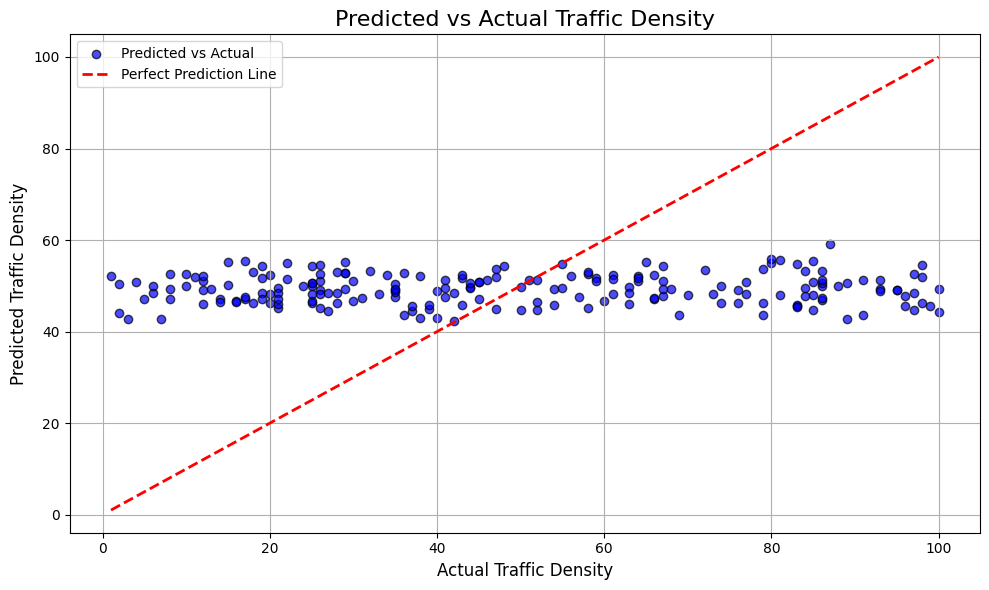

In [12]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', edgecolor='black', alpha=0.7, label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', linewidth=2, label='Perfect Prediction Line')
plt.title('Predicted vs Actual Traffic Density', fontsize=16)
plt.xlabel('Actual Traffic Density', fontsize=12)
plt.ylabel('Predicted Traffic Density', fontsize=12)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


## Visualize Residuals

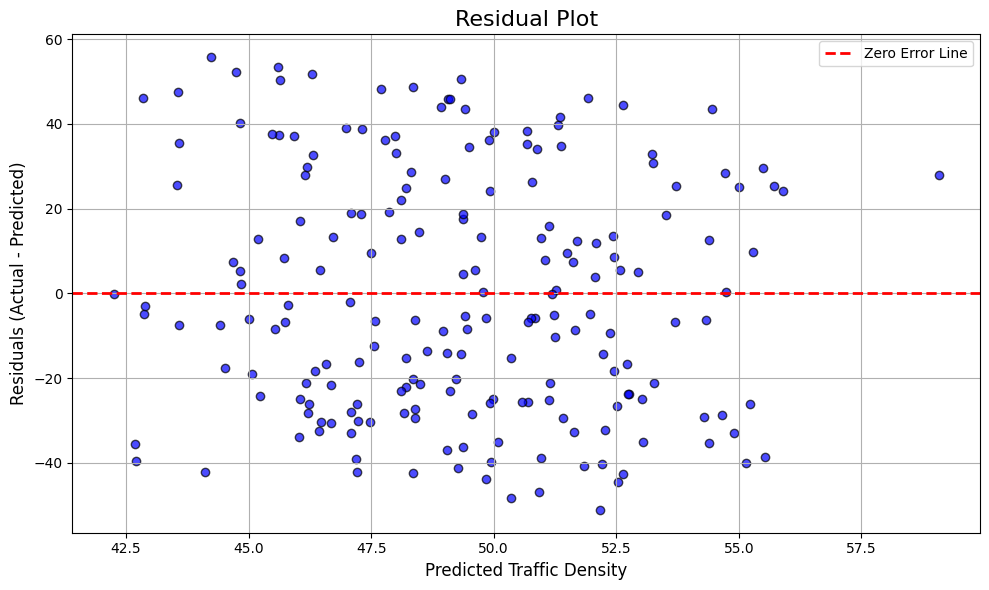

In [13]:
residuals = y_test - y_pred

plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, color='blue', edgecolor='black', alpha=0.7)
plt.axhline(y=0, color='red', linestyle='--', linewidth=2, label='Zero Error Line')
plt.title('Residual Plot', fontsize=16)
plt.xlabel('Predicted Traffic Density', fontsize=12)
plt.ylabel('Residuals (Actual - Predicted)', fontsize=12)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


## Feature Importance

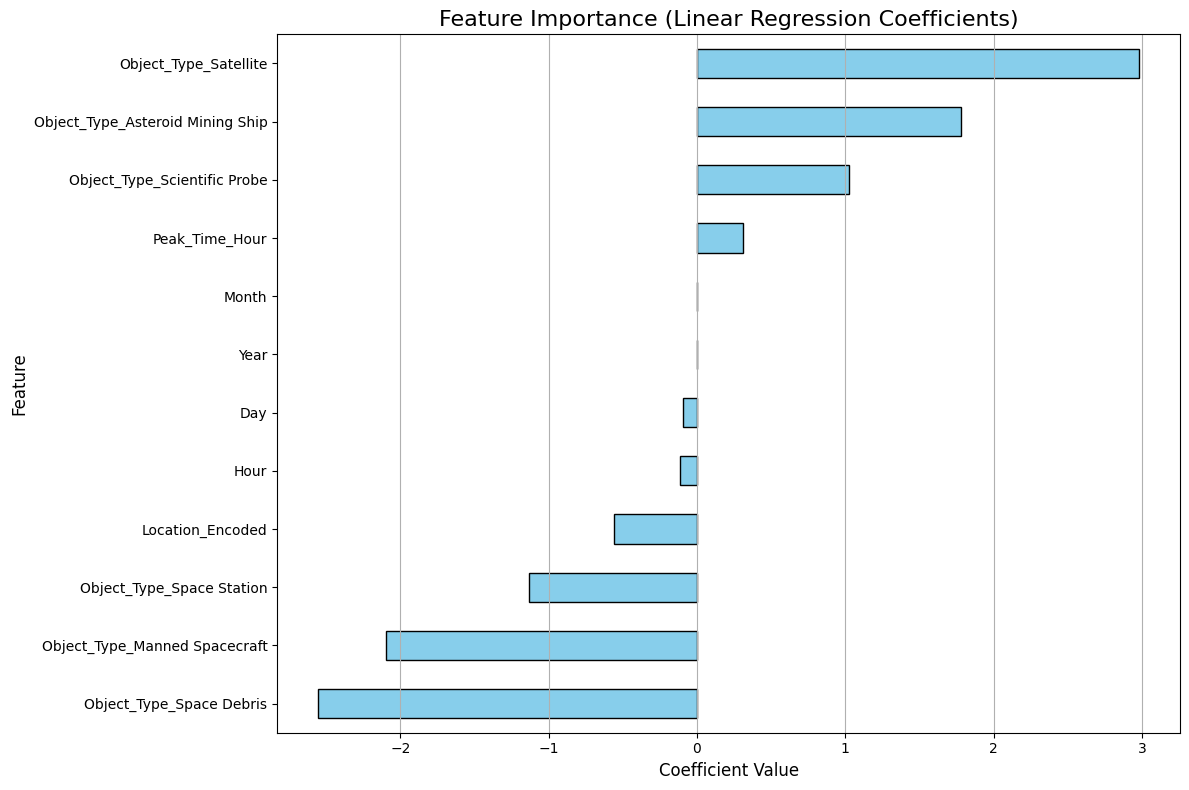

In [14]:
coefficients = pd.Series(model.coef_, index=X.columns)

plt.figure(figsize=(12, 8))
coefficients.sort_values().plot(kind='barh', color='skyblue', edgecolor='black')
plt.title('Feature Importance (Linear Regression Coefficients)', fontsize=16)
plt.xlabel('Coefficient Value', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.grid(axis='x')
plt.tight_layout()
plt.show()
